In [1]:
#https://blog.keras.io/building-autoencoders-in-keras.html
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32
# 784 개를 24.5의 배율로 압축해서 32개로 만듬.

# input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input

# 784-> 32 Dense Net
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
# 32->784 Dense Net
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
# input_img->encoded->decoded 과정을 하나로 묶겠다
# 말그대로 전체 과정임
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# input_img 를 넣으면 encoded 과정 까지만 하겠음.
encoder = Model(input_img, encoded)


# create a placeholder for an encoded (32-dimensional) input
# 파이썬 특징 , [encoding_dim][알맞은 사이즈] 로 구성된 데이터를 받는 구조.
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
# autoencoder 과정을 지나면 데이터는 784->32->784 가 된다
# layer[-1]  마지막 하나를 가지고 오는 거이므로 결국 decoder 된 값을 가지게 된다.
decoder_layer1 = autoencoder.layers[-1]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-4]
print(decoded)
# create the decoder model
#encoded_input을 넣어서 decoder_layer를 가져온다.
decoder = Model(encoded_input,
                decoder_layer1(decoder_layer2(decoder_layer3(encoded_input))))


from keras.datasets import mnist
import numpy as np

#우리는 autoencoder 과정을 통해서 입력과 출력이 같은지 비교
# test 값이 따로 필요가 없음. x값이 입력이자 결과임
(x_train, _), (x_test, _) = mnist.load_data()

# 255값 까지 존재하는걸 나눠서 0~1 사이의 값으로 변환 시킨다
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

#x_train을 가지고 압축 하고 복구 할꺼임, 그렇기 때문에 y = x_train
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib (don't ask)

import matplotlib.pyplot as plt
print("here")
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Using TensorFlow backend.


Tensor("dense_6/Sigmoid:0", shape=(?, 784), dtype=float32)
(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3260 - val_loss: 0.2625
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2536 - val_loss: 0.2436
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2347 - val_loss: 0.2236
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2151 - val_loss: 0.2086
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2052 - val_loss: 0.2020
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1925 - val_loss: 0.1834
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1817 - val_loss: 0.1770
Epoch 8/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1741 - val_loss: 0.1704
Epoch 9/100
60000

60000/60000 [==============================] - 1s 16us/step - loss: 0.1042 - val_loss: 0.1037
Epoch 77/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1040 - val_loss: 0.1034
Epoch 78/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1038 - val_loss: 0.1017
Epoch 79/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1036 - val_loss: 0.1024
Epoch 80/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1033 - val_loss: 0.1044
Epoch 81/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1031 - val_loss: 0.1039
Epoch 82/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1029 - val_loss: 0.1027
Epoch 83/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1027 - val_loss: 0.1010
Epoch 84/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1025 - val_loss: 0.1037
Epoch 85/100
60000/60000 [========================

<Figure size 2000x400 with 20 Axes>

here


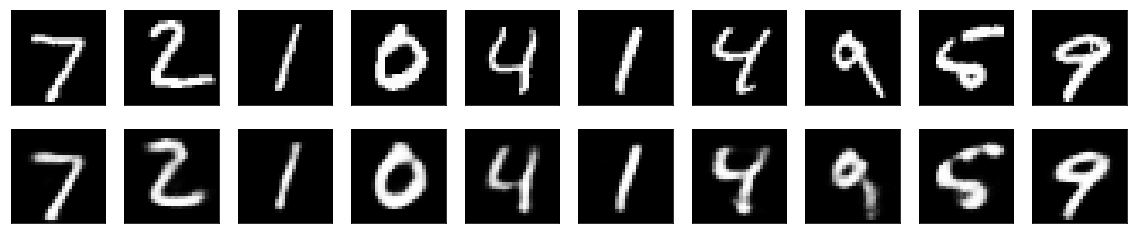

In [2]:
print("here")
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()